<a href="https://colab.research.google.com/github/osvaldoguti/TrabajoFinalDataScienceIII/blob/main/TrabajoFinalDSIIIOsvaldoGutierrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRESENTACION DEL DATASET**

El Dataset se muestra el resultado de las evaluaciones de distintos catadores de vinos. En la misma se evaluan vinos de distintas regiones del mundo, variedades, marcas y bodegas.

Columnas:

country: pais de elaboracion del vino.

description: descripcion hecha por la persona de cata el vino.

designation: tipo de vino.

points: puntos otorgados en la cata.

price: precio del vino en el mercado.

province: provincia donde se elabora el vino.

region_1: region donde se encuentra el viñedo.

region_2: region general.

taster_name: nombre de la persona que cata el vino.

taster_twitter_handle: direccion de Twitter de la persona que cata el vino.

title: nombre del vino.

variety: variedad de la uva con la que se elaboro el vino.

winery: nombre de la bodega que elaboro el vino.


Carga del Dataset

In [1]:
# INGRESAR MI TOKEN DE KAGGLE A COLAB
from google.colab import files
files.upload()  # Selecciona el archivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"osvaldogutierrez","key":"65b739c7d18dee1d54e62e33f35d4a7d"}'}

In [2]:
# Configurar y descargar el dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d zynicide/wine-reviews

Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews
License(s): CC-BY-NC-SA-4.0
  0% 0.00/50.9M [00:00<?, ?B/s]
100% 50.9M/50.9M [00:00<00:00, 1.33GB/s]


In [4]:
# Descomprimir el archivo
!unzip -q wine-reviews.zip -d ./datos

Carga de algunas librerias necesarias

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Procedemos a cargar el dataset y presentar sus primeros valores.
df = pd.read_csv('./datos/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Analisis inicial del Dataset

In [7]:
# Ver el tamaño del dataset
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (129971, 14)


In [8]:
# Ver el tipo de datos y si hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [9]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [10]:
# Ver cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


 Debido a que son pocos casos y de acuerdo a los objetivos que plantearemos mas adelantes para este trabajo procedemos a eliminar las filas que contienen valores nulos para las columanas Precio, Pais y Variedad.

In [11]:
# Eliminar filas donde 'price', 'country' o 'variety' sean nulos
df = df.dropna(subset=['price', 'country', 'variety'])

# Verificamos que ya no haya nulos en esas columnas
print(df[['price', 'country', 'variety']].isnull().sum())


price      0
country    0
variety    0
dtype: int64


Con nuestro conocimiento de vinos sabemos que algunos ellos tienen precio muy por encima de la media, por tal motivo procedemos a hacer un analisis de los mismos como de su puntuacion en busca de Outliers.

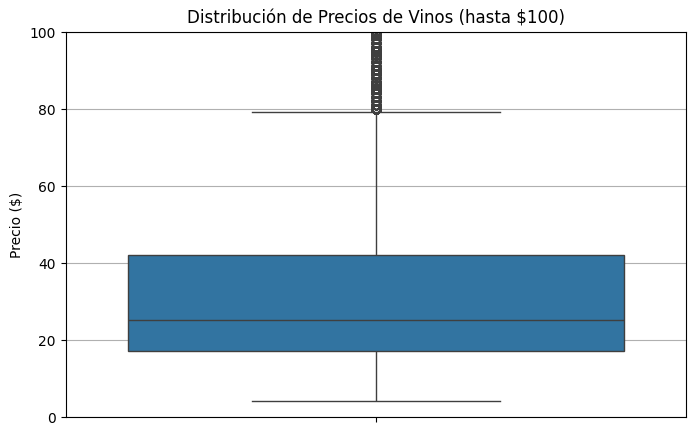

In [12]:
# Boxplot Precio con límite en el eje Y
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='price')
plt.title('Distribución de Precios de Vinos (hasta $100)')
plt.ylabel('Precio ($)')
plt.ylim(0, 100)  # Acá limitamos de 0 a 100 dólares
plt.grid(axis='y')
plt.show()


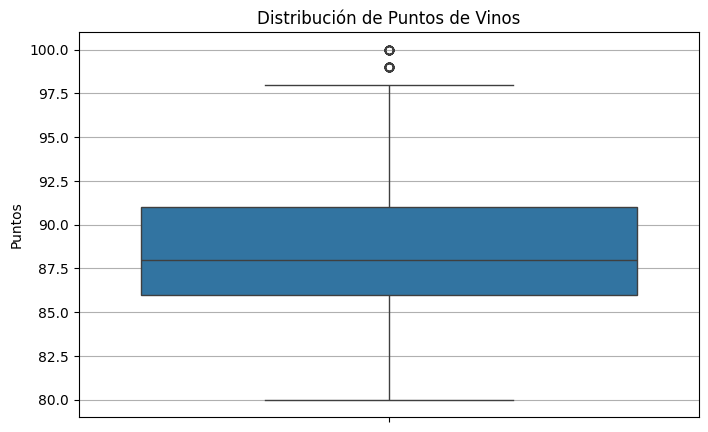

In [13]:
# Boxplot Puntos
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='points')
plt.title('Distribución de Puntos de Vinos')
plt.ylabel('Puntos')
plt.grid(axis='y')
plt.show()


Teniendo en cuenta el resultado de los graficos procedemos a eliminar los valores que son outliers:

Precios: consideramos outliers los vinos con precio mayor a 80 dólares.

Puntos: consideramos outliers los vinos con más de 98 puntos.

In [14]:
# Filtrar para eliminar outliers
df = df[(df['price'] <= 80) & (df['points'] <= 98)]

# Verificamos rápidamente
print(df[['price', 'points']].describe())


               price         points
count  114549.000000  114549.000000
mean       29.505277      88.204236
std        16.713478       2.915028
min         4.000000      80.000000
25%        16.000000      86.000000
50%        25.000000      88.000000
75%        40.000000      90.000000
max        80.000000      98.000000


###EXPLORACION

Con el objetivo de ir teniendo una nocion de los datos que presenta en Dataste con relacion a:

- Si hay alguna tendencia general (por ejemplo, que a mayor precio haya mejores puntajes).

- Qué tanto se dispersan los datos (si hay vinos baratos con buenos puntos o caros con puntos bajos).

Procedemos a realizar el siguiente grafico.

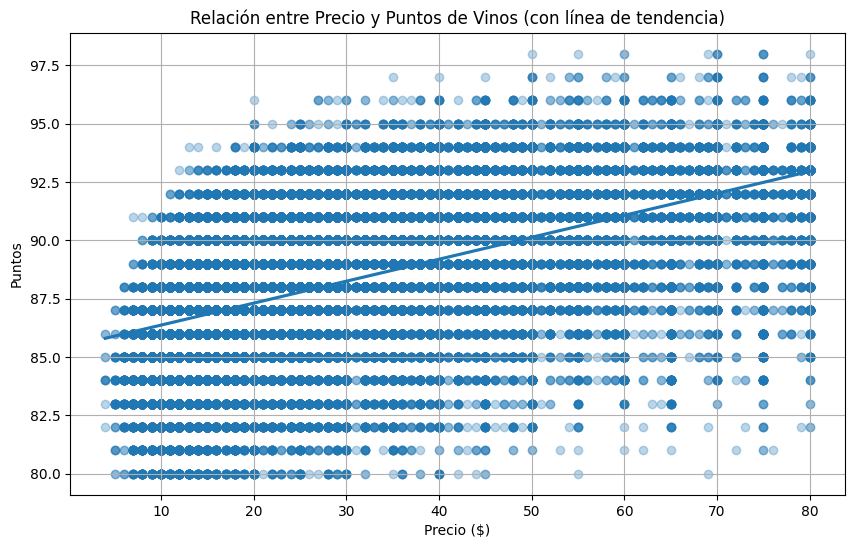

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=df, scatter_kws={'alpha':0.3})
plt.title('Relación entre Precio y Puntos de Vinos (con línea de tendencia)')
plt.xlabel('Precio ($)')
plt.ylabel('Puntos')
plt.grid(True)
plt.show()


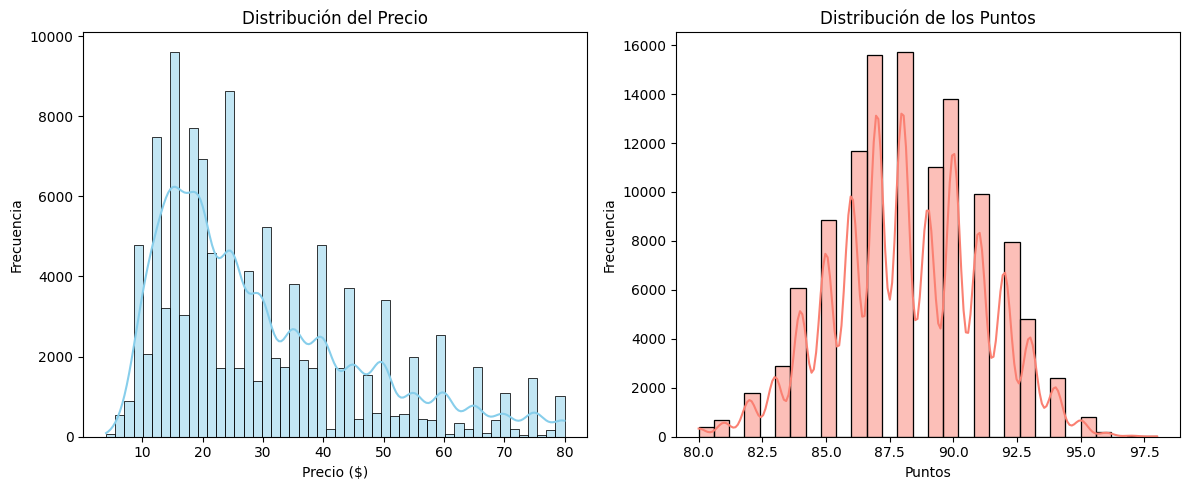

In [16]:
plt.figure(figsize=(12, 5))

# Distribución del Precio
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribución del Precio')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')

# Distribución de los Puntos
plt.subplot(1, 2, 2)
sns.histplot(df['points'], kde=True, bins=30, color='salmon')
plt.title('Distribución de los Puntos')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Usamos el coeficiente de correlación de Pearson para ver cual es la correlacion entre ambos:

In [17]:
correlacion = df['price'].corr(df['points'])
print(f'Coeficiente de correlación (Pearson): {correlacion:.2f}')


Coeficiente de correlación (Pearson): 0.54


Debido a la variedad de los datos procedemos a mostrar los mas relevantes.

Precio promedio por país (top 10 países)


/tmp/ipython-input-18-2168998537.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='price', data=df_top_countries, estimator='mean', ci=None)


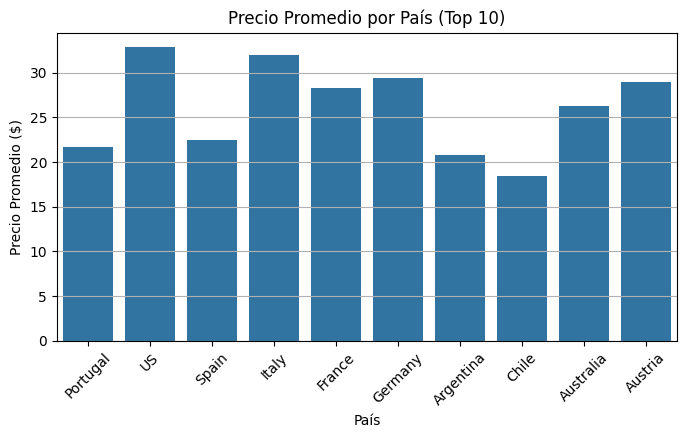

In [18]:
# Top 10 países con más vinos en el dataset
top_countries = df['country'].value_counts().head(10).index

# Filtrar el dataset solo a esos países
df_top_countries = df[df['country'].isin(top_countries)]

# Gráfico de precio promedio por país
plt.figure(figsize=(8,4))
sns.barplot(x='country', y='price', data=df_top_countries, estimator='mean', ci=None)
plt.title('Precio Promedio por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Puntuación promedio por variedad (top 10 variedades)

/tmp/ipython-input-19-1119848569.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='variety', y='points', data=df_top_varieties, estimator='mean', ci=None)


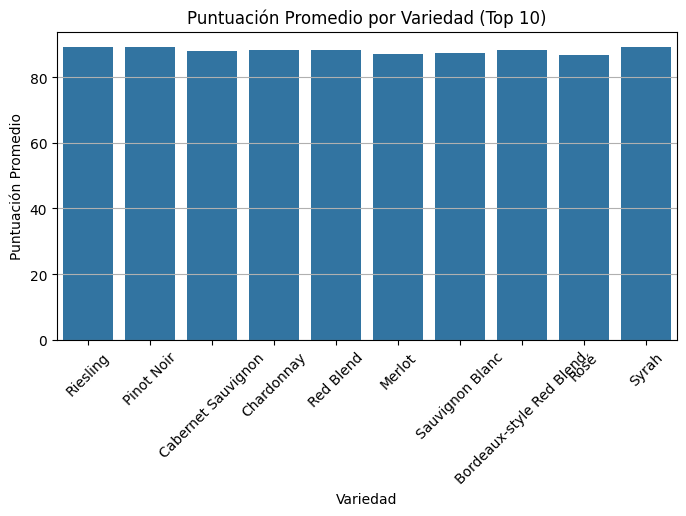

In [19]:
# Top 10 variedades más comunes
top_varieties = df['variety'].value_counts().head(10).index

# Filtrar solo esas variedades
df_top_varieties = df[df['variety'].isin(top_varieties)]

# Gráfico de puntuación promedio por variedad
plt.figure(figsize=(8,4))
sns.barplot(x='variety', y='points', data=df_top_varieties, estimator='mean', ci=None)
plt.title('Puntuación Promedio por Variedad (Top 10)')
plt.xlabel('Variedad')
plt.ylabel('Puntuación Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# **SECCION NLP**

Procedemos a hacer un analisis de los comentarios que dieron los distintos evaluadores.

DESCARGAMOS LA LIBRERIA DE SPACY

Debido a que el dataset esta en ingles, lo instalamos para ese idioma

In [20]:
!pip install spacy

In [21]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
import spacy

# Cargar modelo en inglés
nlp = spacy.load("en_core_web_sm")

##TOKENIZACION

Se procede a hacer la tokenizacion de la columna description

Debido a que son muchas filas, decidi filtrar por los vinos que tienen mejor puntaje (95 o mas)

In [23]:
# Filtramos los vinos con puntaje mayor o igual a 95
df_top = df[df['points'] >= 95].copy()

In [24]:
# Aplicamos la tokenización solo a los vinos filtrados
df_top['tokens'] = df_top['description'].apply(lambda text: [token.text for token in nlp(text)])

In [25]:
df_top[['description', 'tokens']].head()

,description,tokens
352,Citrus-kissed saltiness lies at the core of th...,"[Citrus, -, kissed, saltiness, lies, at, the, ..."
355,A waft of smoky char and toasty oak provide a ...,"[A, waft, of, smoky, char, and, toasty, oak, p..."
358,"Intensely fragrant, this honey-sweet auslese w...","[Intensely, fragrant, ,, this, honey, -, sweet..."
361,"Enticing scents of ripe berry, underbrush, gri...","[Enticing, scents, of, ripe, berry, ,, underbr..."
364,"For 2014, the Weber is the star of a very fine...","[For, 2014, ,, the, Weber, is, the, star, of, ..."


##LEMATIZACION

In [26]:
# Lematizamos cada palabra en la descripción
df_top['lemmas_only'] = df_top['description'].apply(
    lambda text: [token.lemma_ for token in nlp(text)]
)

In [27]:
df_top[['description', 'lemmas_only']].head()

,description,lemmas_only
352,Citrus-kissed saltiness lies at the core of th...,"[Citrus, -, kiss, saltiness, lie, at, the, cor..."
355,A waft of smoky char and toasty oak provide a ...,"[a, waft, of, smoky, char, and, toasty, oak, p..."
358,"Intensely fragrant, this honey-sweet auslese w...","[intensely, fragrant, ,, this, honey, -, sweet..."
361,"Enticing scents of ripe berry, underbrush, gri...","[enticing, scent, of, ripe, berry, ,, underbru..."
364,"For 2014, the Weber is the star of a very fine...","[for, 2014, ,, the, Weber, be, the, star, of, ..."


##REMOCION DE STOPWORDS

In [28]:
# Crear una nueva columna con lemas filtrados (sin stopwords ni puntuación, en minúscula)
df_top['lemmas_clean'] = df_top['description'].apply(
    lambda text: [
        token.lemma_.lower()
        for token in nlp(text)
        if not token.is_stop and not token.is_punct
    ]
)


Como para mostrar el resultado de lo realizado procedemos a mostrar unos graficos

In [29]:
from collections import Counter

# Unir todas las listas de palabras lematizadas en una sola
all_words = [word for lemmas in df_top['lemmas_clean'] for word in lemmas]

# Contar la frecuencia de cada palabra
word_freq = Counter(all_words)

###NUBE DE PALABRAS

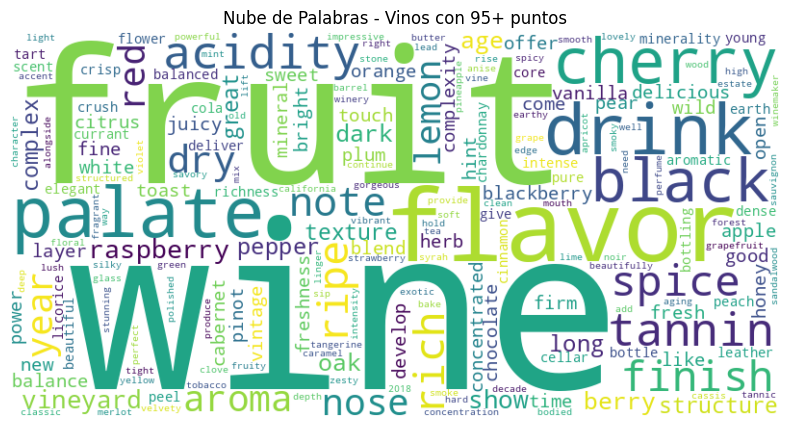

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Vinos con 95+ puntos")
plt.show()


###GRAFICO DE BARRAS DE PALABRAS MAS COMUNES

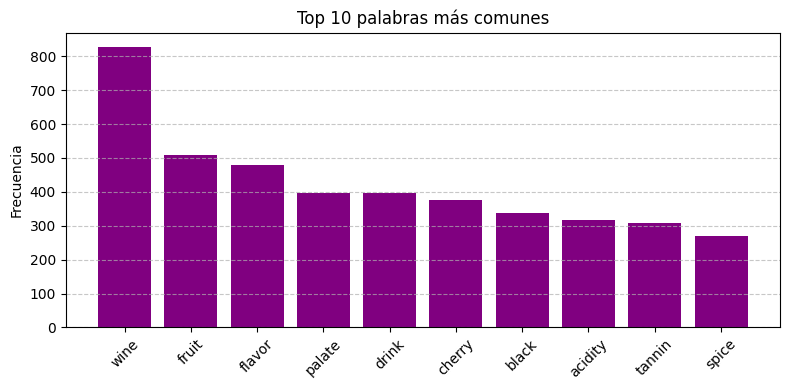

In [31]:
# Obtener las 10 palabras más frecuentes
top_words = word_freq.most_common(10)

# Separar palabras y sus frecuencias
words, counts = zip(*top_words)

# Gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(words, counts, color='purple')
plt.title("Top 10 palabras más comunes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En una primera aproximacion, vemos que hay palabras que aparecen y que no aportan al analisis. Por lo tanto procedemos a dar de baja las siguientes: WINE, FLAVOR, DRINK.

In [32]:
# Unir todas las palabras en una sola lista
all_words = [word for lemmas in df_top['lemmas_clean'] for word in lemmas]

# Eliminar palabras que no aportan
custom_stopwords = ['wine', 'flavor', 'drink']
all_words = [word for word in all_words if word not in custom_stopwords]

# Contar frecuencia (ya con la lista limpia)
word_freq = Counter(all_words)


Y repetimos el graficos con las palabras mas comunes.

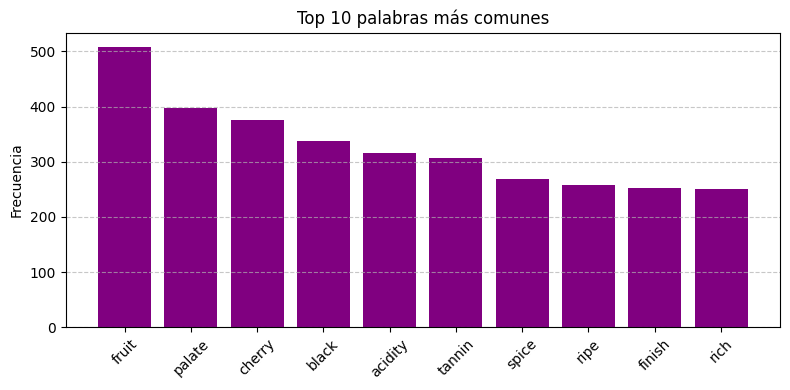

In [33]:
# Obtener las 10 palabras más frecuentes
top_words = word_freq.most_common(10)

# Separar palabras y sus frecuencias
words, counts = zip(*top_words)

# Gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(words, counts, color='purple')
plt.title("Top 10 palabras más comunes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **SECCION DEEP LEARNING**

Con motivo de aplicar alguna de las redes neuronales de Deep Learning, procedemos a definir el objetivo de predecir la puntuacion que tendria un vino de acuerdo a los comentarios vertidos por el catador. Debido a que los comentarios son lineas de texto, la red utilizada es RNN (REDES NEURONALES RECURRENTES)

##PREPROCESAMIENTO

In [34]:
# Crear variable objetivo (binaria)

# Etiqueta binaria: 1 si points >= 95, 0 si no
df['label'] = (df['points'] >= 90).astype(int)



In [35]:
df['label'].value_counts()


,count
label,
0,74670
1,39879


In [36]:
# Dividir datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split

texts = df['description'].values
labels = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [37]:
# Tokenización y padding con Keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Configuración
vocab_size = 10000  # límite de palabras
maxlen = 100        # longitud máxima de las secuencias

# Tokenizador
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convertir textos en secuencias
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')


## MODELO RNN CON KERAS

In [38]:
# Definir y compilar el modelo

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Entrenar el modelo

history = model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test))


Epoch 1/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - accuracy: 0.6544 - loss: 0.6458 - val_accuracy: 0.6478 - val_loss: 0.6490
Epoch 2/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6548 - loss: 0.6447 - val_accuracy: 0.6485 - val_loss: 0.6294
Epoch 3/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.6502 - loss: 0.6453 - val_accuracy: 0.6477 - val_loss: 0.6503
Epoch 4/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7049 - loss: 0.5666 - val_accuracy: 0.8175 - val_loss: 0.4024
Epoch 5/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8434 - loss: 0.3530 - val_accuracy: 0.7909 - val_loss: 0.4682


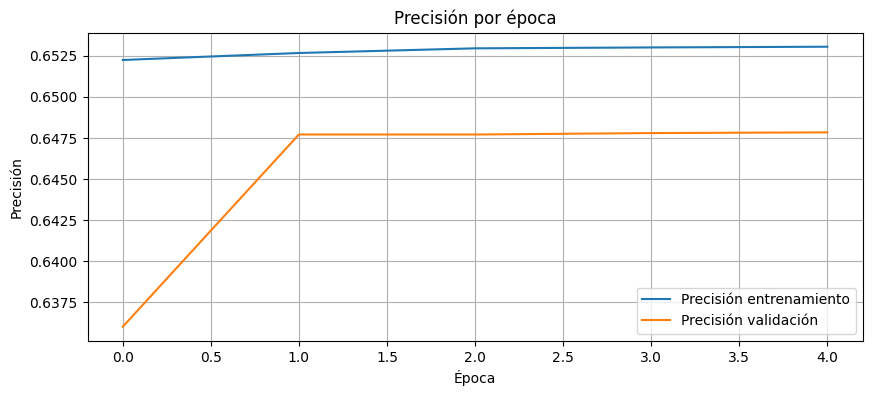

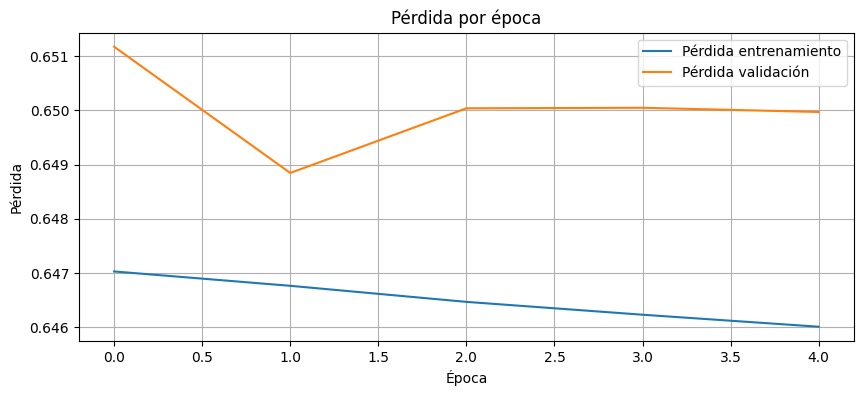

In [ ]:
import matplotlib.pyplot as plt

# Precisión
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión por época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Pérdida
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida por época')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluar rendimiento

loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Accuracy en test: {accuracy:.2f}")


716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6424 - loss: 0.6526
Accuracy en test: 0.65


In [ ]:
from sklearn.metrics import classification_report

# Predicciones sobre el set de prueba
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Reporte de clasificación
print(classification_report(y_test, y_pred, digits=3))


716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

           0      0.648     1.000     0.786     14839
           1      0.800     0.000     0.001      8071

    accuracy                          0.648     22910
   macro avg      0.724     0.500     0.394     22910
weighted avg      0.701     0.648     0.510     22910



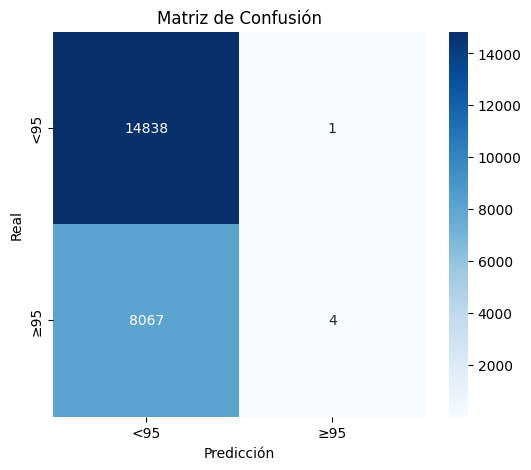

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<95', '≥95'], yticklabels=['<95', '≥95'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


En esta segunda parte del trabajo se aplicó una técnica de aprendizaje profundo (Deep Learning) utilizando una red neuronal recurrente (RNN) para predecir si un vino recibiría una puntuación igual o superior a 90 puntos, basándose únicamente en el análisis del texto de su descripción.

Tras el preprocesamiento y vectorización del texto mediante embeddings, se entrenó una RNN simple de una sola capa.

Los resultados obtenidos muestran una precisión aceptable en la clase mayoritaria (vinos con puntaje menor a 90), pero un desempeño muy limitado para identificar correctamente los vinos de alta puntuación. En particular, el modelo no logró generalizar bien sobre la clase minoritaria, con un recall cercano a cero, lo que indica que casi no logró identificar vinos buenos en los datos de prueba.

Este desempeño sugiere que, si bien las descripciones de los vinos contienen información relevante, una red neuronal simple puede no ser suficiente para capturar las complejidades del lenguaje natural en este contexto. Además, el desbalance de clases y la posible falta de señal diferenciadora entre los textos también pudieron influir en la calidad del modelo.



# **SECCION ELECCION Y DESARROLLO**

###**Introducción y motivación**

En el contexto actual del mercado del vino, donde la percepción del consumidor y las evaluaciones de expertos impactan directamente en el posicionamiento y valor de un producto, comprender qué elementos textuales se asocian a vinos de alta calidad representa una oportunidad valiosa.

Este trabajo propone aplicar técnicas de procesamiento de lenguaje natural (NLP) y redes neuronales para analizar los comentarios de expertos enológicos disponibles en una base de datos global de vinos. A partir de estos textos, se entrena un modelo capaz de predecir si un vino será bien puntuado solo con su descripción.

La motivación detrás de este enfoque es doble:

*   Explorar el potencial de la inteligencia artificial aplicada al análisis sensorial y comercial del vino.

*   Identificar patrones descriptivos y características que permitan detectar oportunidades de inversión o mejora de producto, especialmente en mercados competitivos como el argentino.

Este análisis puede resultar útil para:

*   Productores que buscan adaptar su perfil de vino a lo que el mercado valora.
*   Inversores o distribuidores interesados en detectar vinos subvalorados con alto potencial.
*   Enólogos y sommeliers que quieran validar o enriquecer sus propias percepciones con evidencia empírica.








###**Objetivo de esta sección**

Entrenar un modelo de red neuronal básica que prediga si un vino va a tener una puntuación ≥ 90 solo a partir de su descripción (texto), como punto de partida para luego mejorar.

Tomamos como objetivo predecir si un vino alcanza una puntuación destacada (90 puntos o más), transformando así un problema de lenguaje en una tarea de clasificación binaria.

In [43]:
import pandas as pd

# Variable objetivo
df['label'] = (df['points'] >= 90).astype(int)

# Selección de columnas necesarias
df = df[['description', 'label']]


###**División en entrenamiento y prueba**

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['description'], df['label'], test_size=0.2, random_state=42)


###**Tokenización y padding**

Transformamos las descripciones textuales en secuencias de números, permitiendo que el modelo las procese como entradas ordenadas.

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizador (máx 10000 palabras más comunes)
vocab_size = 10000
maxlen = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')


###**Construcción del modelo base**

Nuestro modelo base se compone de una única capa de embedding seguida de una capa de decisión. Esta arquitectura simple nos permite establecer una línea de base de rendimiento.

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###**Entrenamiento del modelo**

In [47]:
history = model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test))


Epoch 1/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7903 - loss: 0.4362 - val_accuracy: 0.8433 - val_loss: 0.3506
Epoch 2/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8749 - loss: 0.2932 - val_accuracy: 0.8460 - val_loss: 0.3462
Epoch 3/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9128 - loss: 0.2222 - val_accuracy: 0.8493 - val_loss: 0.3548
Epoch 4/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9486 - loss: 0.1504 - val_accuracy: 0.8457 - val_loss: 0.3899
Epoch 5/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9741 - loss: 0.0920 - val_accuracy: 0.8449 - val_loss: 0.4370


###**Evaluación y gráficos**

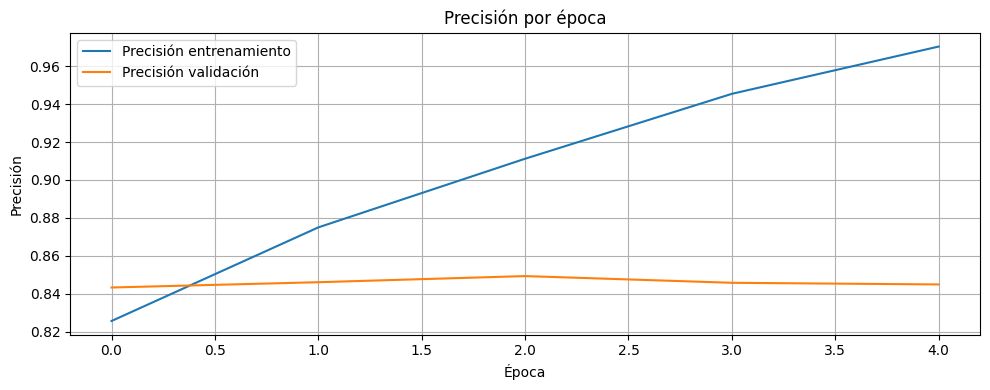

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión por época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


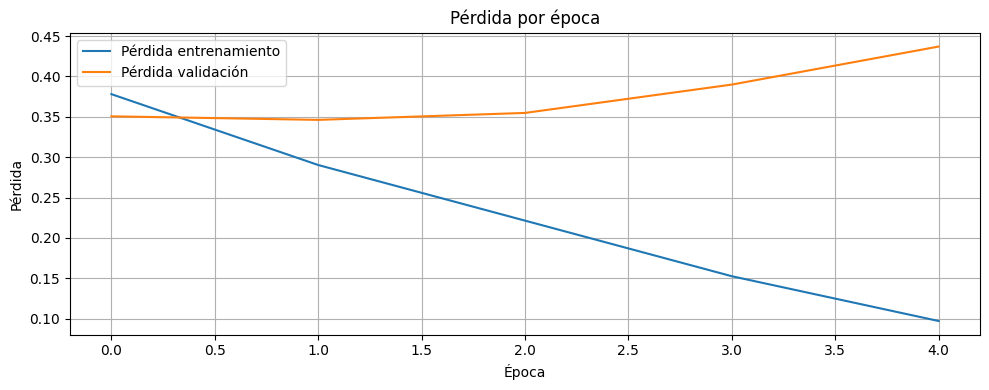

In [49]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida por época')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


El modelo simple ya logra una precisión del 84%, lo que demuestra que hay una relación entre el lenguaje de la descripción y la calidad del vino. Sin embargo, a partir de la tercera época comienza a evidenciarse una brecha entre la pérdida de entrenamiento y validación, indicando que el modelo empieza a sobreajustar. Esto nos da la idea de que deberiamos complejizar el modelo para que capture mejor la complejidad del texto sin perder capacidad de generalización.

**Matriz de Confusión**

716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


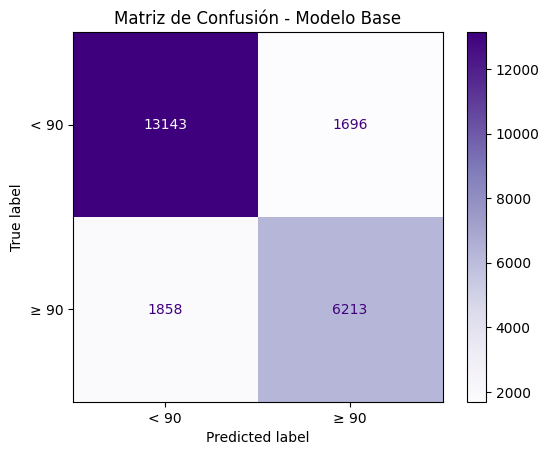

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predicciones (como probabilidades)
y_pred_prob = model.predict(X_test_pad)

# Convertimos a etiquetas binarias (umbral 0.5)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["< 90", "≥ 90"])
disp.plot(cmap='Purples', values_format='d')
plt.title("Matriz de Confusión - Modelo Base")
plt.show()


Vemos que logra identificar correctamente una buena parte de los vinos de alta puntuación, aunque también presenta una cantidad de falsos negativos, lo que sugiere oportunidades de mejora en la capacidad del modelo para detectar vinos valiosos.

###**Código del modelo mejorado (LSTM)**

Para mejorar la capacidad del modelo de captar patrones complejos en el lenguaje, ampliamos la arquitectura incorporando una capa LSTM.

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Definir modelo
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen),
    LSTM(64),  # nueva capa recurrente
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
history_lstm = model_lstm.fit(
    X_train_pad, y_train,
    epochs=5,
    validation_data=(X_test_pad, y_test)
)


Epoch 1/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.7198 - loss: 0.5476 - val_accuracy: 0.8405 - val_loss: 0.3514
Epoch 2/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.8564 - loss: 0.3252 - val_accuracy: 0.8476 - val_loss: 0.3418
Epoch 3/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.8712 - loss: 0.2958 - val_accuracy: 0.8467 - val_loss: 0.3634
Epoch 4/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8876 - loss: 0.2646 - val_accuracy: 0.8449 - val_loss: 0.3534
Epoch 5/5
2864/2864 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9018 - loss: 0.2351 - val_accuracy: 0.8466 - val_loss: 0.3697


El modelo mejorado muestra un aprendizaje más progresivo y profundo, alcanzando una precisión similar al modelo base, aunque con mayor capacidad interna. Si bien agregar más épocas podría afinar aún más la predicción, también comienza a evidenciar sobreajuste, por lo que en esta etapa preferimos mantener la estructura simple para fines comparativos.

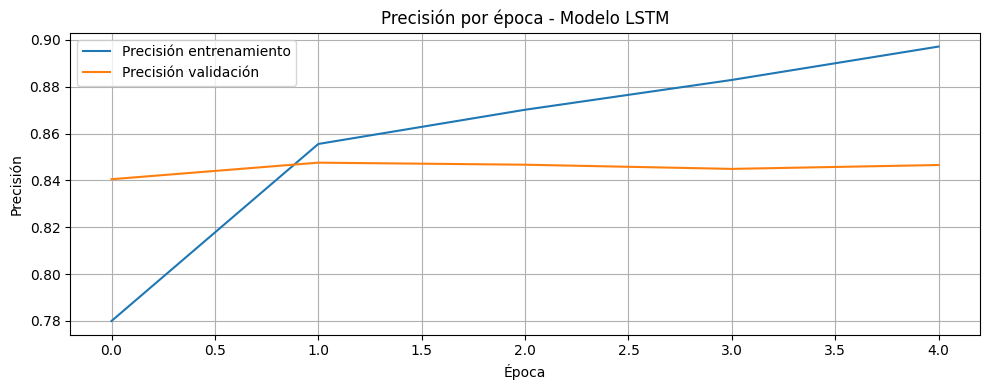

In [53]:
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión por época - Modelo LSTM')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


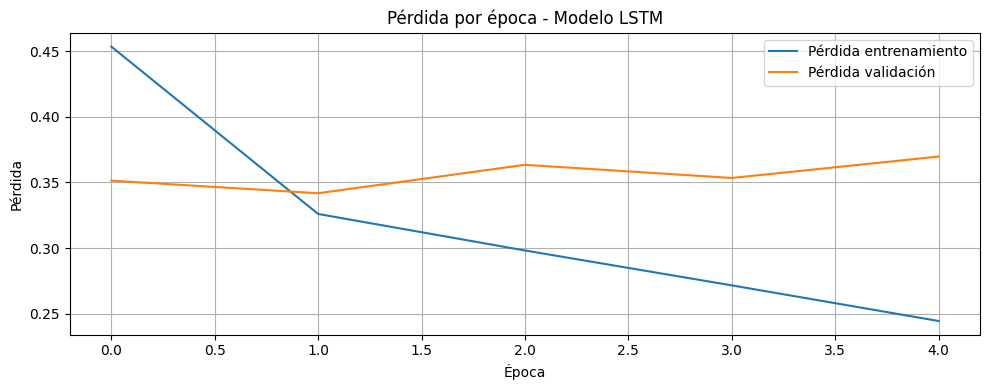

In [54]:
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_lstm.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida por época - Modelo LSTM')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


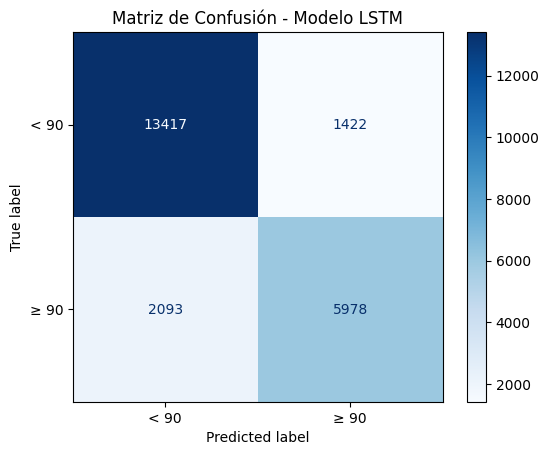

In [55]:
# Predicciones
y_pred_prob_lstm = model_lstm.predict(X_test_pad)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int).flatten()

# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lstm = confusion_matrix(y_test, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=["< 90", "≥ 90"])
disp_lstm.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión - Modelo LSTM")
plt.show()


Al comparar ambos modelos, observamos que la red neuronal LSTM logra un mejor entendimiento del texto, lo cual se refleja en una reducción importante de falsos negativos: es decir, predice mejor qué vinos alcanzan una puntuación destacada. Si bien la precisión global es similar al modelo base, el LSTM muestra mayor solidez al identificar vinos de alta calidad, lo cual es clave para tomar decisiones informadas de inversión.

###**Conclusión Final**

En este trabajo se exploró el potencial del análisis de lenguaje natural combinado con redes neuronales para predecir la calidad de vinos a partir de sus descripciones. A través del procesamiento de textos con técnicas de NLP y el entrenamiento de modelos de deep learning, se logró transformar información subjetiva enológica en datos cuantificables para clasificación.

Inicialmente, se construyó un modelo de red neuronal simple que ya alcanzó una precisión destacada al diferenciar entre vinos con puntaje alto (≥ 90) y aquellos con puntaje inferior. Este modelo sirvió como base de comparación.

Luego se implementó un modelo más robusto, utilizando una red neuronal recurrente (LSTM). Si bien la precisión global se mantuvo en valores similares, el modelo LSTM mostró mejoras relevantes en la capacidad para identificar correctamente vinos de alta puntuación, reduciendo los falsos negativos y aportando mayor profundidad en el análisis.

Estos resultados demuestran que es posible utilizar estas herramientas para anticipar la calidad de un vino a partir del lenguaje utilizado por expertos, pudiendo ser utilizado como:

*   Asistencia a sommeliers o enólogos en la evaluación preliminar de vinos
*   Recomendaciones para productores en el diseño de perfiles sensoriales más valorados
*   Identificación de oportunidades de inversión en vinos con potencial de alto rendimiento en el mercado

